# Demo: Analyzing Market Data Across Time

In [1]:
# Initial imports
import pandas as pd

In [2]:
# Read the new S&P 500 CSV data into a DataFrame
df_sp500 = pd.read_csv("../Resources/sp500.csv")

# Display the DataFrame
df_sp500.head()

,time,close
0,2019-01-02 12:45:00+00:00,246.16
1,2019-01-02 13:00:00+00:00,246.15
2,2019-01-02 13:15:00+00:00,245.50
3,2019-01-02 13:30:00+00:00,245.71
4,2019-01-02 13:45:00+00:00,245.76


In [3]:
# Transform time column to datetime
df_sp500["time"] = pd.to_datetime(
    df_sp500["time"],
    infer_datetime_format=True,
    utc=True
)

# Convert the time column to the US/Estern timezone
df_sp500["time"] = df_sp500["time"].dt.tz_convert("US/Eastern")

# Verify data type transformation
df_sp500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9328 entries, 0 to 9327
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype                     
---  ------  --------------  -----                     
 0   time    9328 non-null   datetime64[ns, US/Eastern]
 1   close   9328 non-null   float64                   
dtypes: datetime64[ns, US/Eastern](1), float64(1)
memory usage: 145.9 KB


/var/folders/y1/wwd_67td207gyk1vt0gf7w500000gn/T/ipykernel_31469/380881008.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_sp500["time"] = pd.to_datetime(


In [5]:
df_sp500.columns

Index(['time', 'close'], dtype='object')

In [6]:
df_sp500.head()

,time,close
0,2019-01-02 07:45:00-05:00,246.16
1,2019-01-02 08:00:00-05:00,246.15
2,2019-01-02 08:15:00-05:00,245.50
3,2019-01-02 08:30:00-05:00,245.71
4,2019-01-02 08:45:00-05:00,245.76


In [8]:
# Set the time column as DataFrame index
df_sp500 = df_sp500.set_index("time")

# Display the DataFrame
df_sp500.head()

,close
time,
2019-01-02 07:45:00-05:00,246.16
2019-01-02 08:00:00-05:00,246.15
2019-01-02 08:15:00-05:00,245.50
2019-01-02 08:30:00-05:00,245.71
2019-01-02 08:45:00-05:00,245.76


In [9]:
df_sp500.index.dtype

datetime64[ns, US/Eastern]

In [19]:
df_sp500.index.quarter.value_counts()

time
1    2413
2    2395
3    2317
4    2203
Name: count, dtype: int64

In [18]:
# Querying individual date and time components
# print(df_sp500.index.year)
print(df_sp500.index.month)
print(df_sp500.index.day)
print(df_sp500.index.quarter)

Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       ...
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
      dtype='int32', name='time', length=9328)
Index([ 2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
       ...
       30, 30, 30, 30, 30, 30, 30, 30, 30, 30],
      dtype='int32', name='time', length=9328)
Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       ...
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
      dtype='int32', name='time', length=9328)


<Axes: title={'center': 'S&P 500 Closing Prices'}, xlabel='time'>

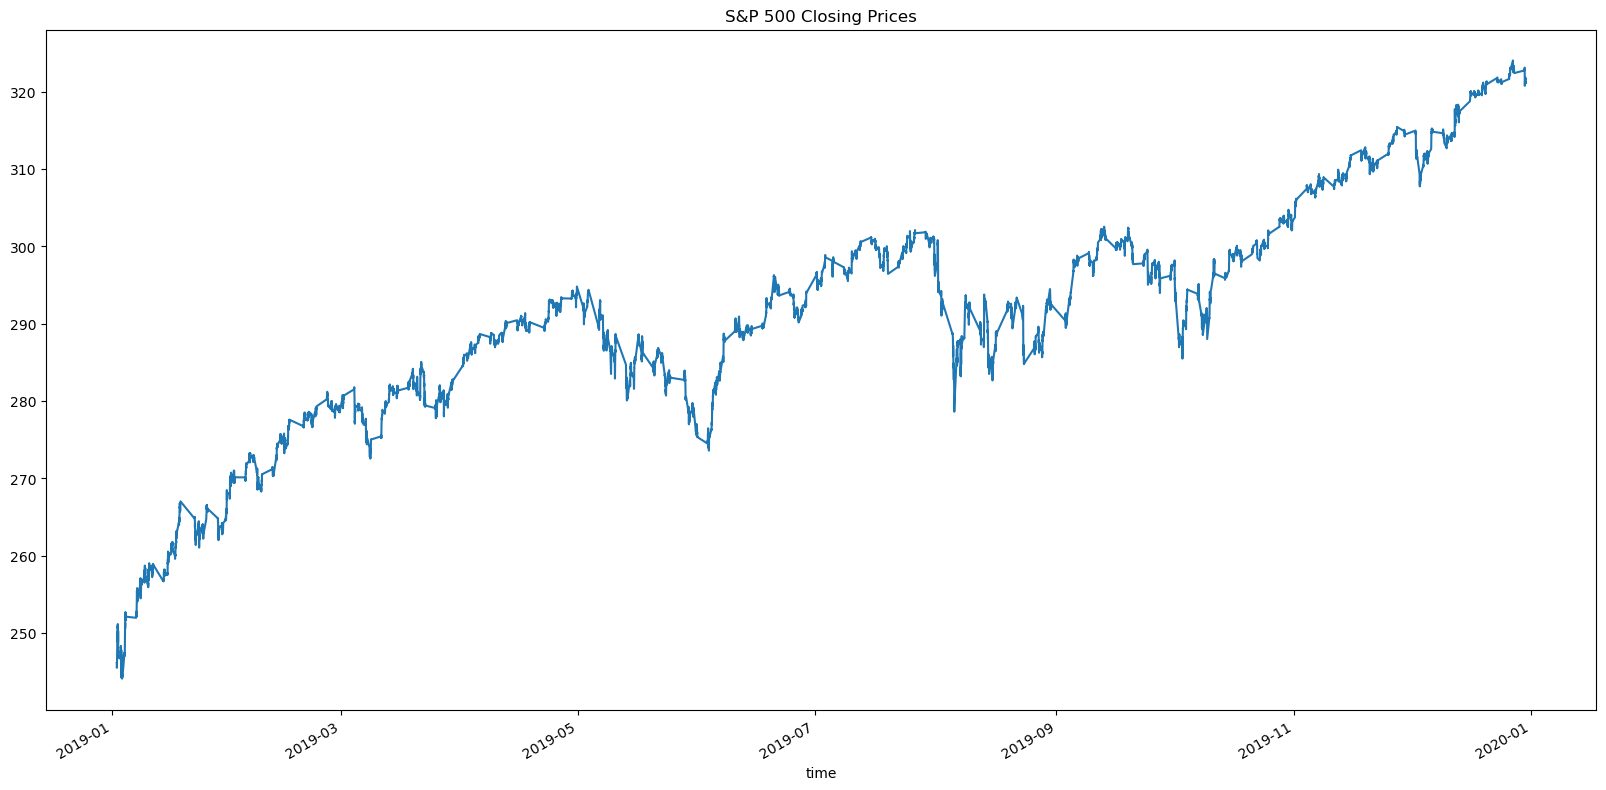

In [20]:
# Plot the close column to examine the trend for closing prices
df_sp500['close'].plot(
title="S&P 500 Closing Prices", figsize=(20, 10)) # kind="line"

In [22]:
# Pick a single date from the DataFrame
# Display the first 20 rows
df_sp500.loc['2019-04-02'].head(20)

,close
time,
2019-04-02 07:00:00-04:00,285.97
2019-04-02 07:15:00-04:00,286.07
2019-04-02 07:30:00-04:00,286.01
2019-04-02 07:45:00-04:00,286.07
2019-04-02 08:00:00-04:00,286.17
2019-04-02 08:15:00-04:00,286.07
2019-04-02 08:30:00-04:00,286.12
2019-04-02 08:45:00-04:00,286.04
2019-04-02 09:00:00-04:00,286.00


In [24]:
# Picking specific times from a datetime range
df_sp500.loc['2019-04-02 07:00:00':'2019-04-02 15:00:00']

,close
time,
2019-04-02 07:00:00-04:00,285.970
2019-04-02 07:15:00-04:00,286.070
2019-04-02 07:30:00-04:00,286.010
2019-04-02 07:45:00-04:00,286.070
2019-04-02 08:00:00-04:00,286.170
2019-04-02 08:15:00-04:00,286.070
2019-04-02 08:30:00-04:00,286.120
2019-04-02 08:45:00-04:00,286.040
2019-04-02 09:00:00-04:00,286.000


<Axes: xlabel='time'>

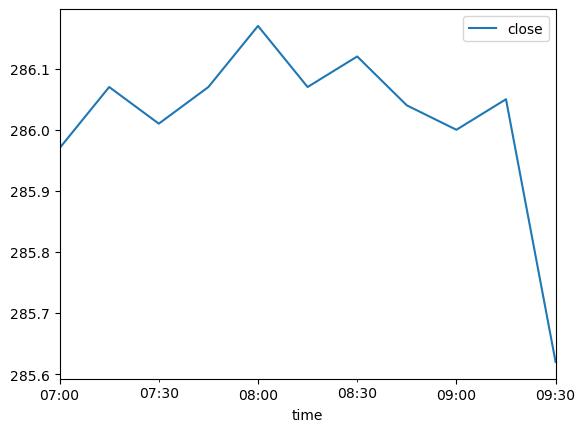

In [25]:
# Plotting pre-market hours trading (7:00 am - 9:30 am)
df_sp500['2019-04-02 07:00:00' : '2019-04-02 09:30:00'].plot()

<Axes: xlabel='time'>

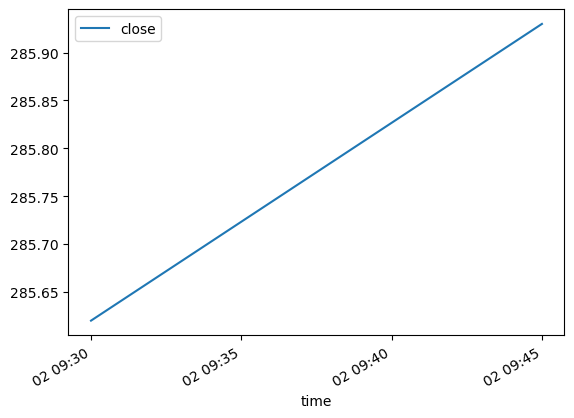

In [26]:
# When the stock market opens there is usually an initial push in one direction
df_sp500['2019-04-02 09:30:00' : '2019-04-02 09:45:00'].plot()

<Axes: xlabel='time'>

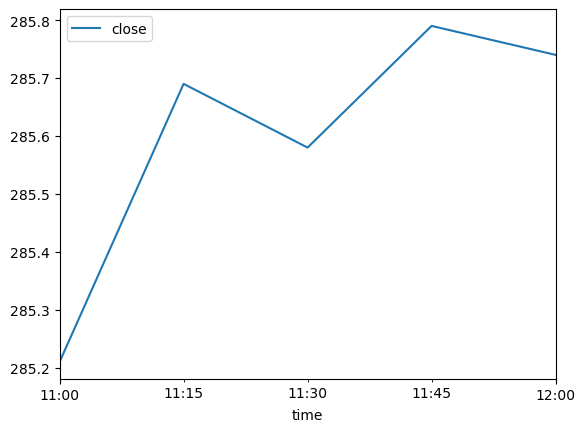

In [27]:
# Closing prices during lunch time
df_sp500['2019-04-02 11:00:00' : '2019-04-02 12:00:00'].plot()

<Axes: xlabel='time'>

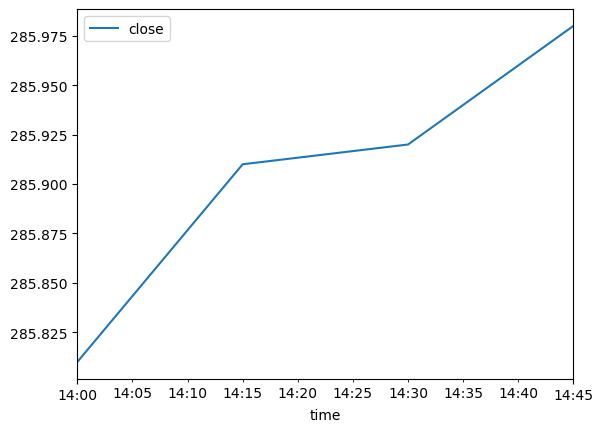

In [28]:
# Closing prices just a little over an hour before market close
df_sp500['2019-04-02 14:00:00' : '2019-04-02 14:45:00'].plot()

<Axes: xlabel='time'>

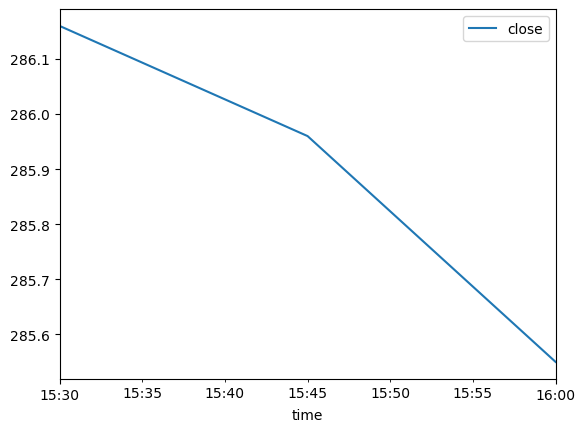

In [29]:
# Closing prices thirty minutes before market closes
df_sp500['2019-04-02 15:30:00' : '2019-04-02 16:00:00'].plot()